In [1]:
#Obliczenia  i analiza  danych
import numpy as np
import pandas as pd

#wizualiacja 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette('icefire_r', 2)
import warnings

%matplotlib inline
#Przetwarzanie

from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import KNNImputer
# Baza danych gównych do nauki modelu
train = pd.read_csv("train.csv") 
# Baza danych Titanica do sprawdzenia modelu
test = pd.read_csv("test.csv")

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_values_per_column = train.isnull().sum()
print(missing_values_per_column.to_string(index=True))

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
object_columns = train.select_dtypes(include='object').columns
numerical_columns = train.select_dtypes(exclude='object').columns
print(object_columns)
print(numerical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 

In [5]:
object_values = train.loc[:, object_columns]
object_values.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Ordinal encoding

In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
Enc_col = object_columns

categories = {}
for col in Enc_col:
    for df in [train, test]:
        df[col + '_Enc'] = enc.fit_transform(df[col].values.reshape(-1, 1))
    categories[col] = enc.categories_[0]  # Store categories for the current column

# Print the mapping
for col in Enc_col:
    print(f"Kolumna: {col}")
    for i, category in enumerate(categories[col]):
        print(f"  Wartość zakodowana: {i} -> Wartość początkowa: {category}")

Kolumna: MSZoning
  Wartość zakodowana: 0 -> Wartość początkowa: C (all)
  Wartość zakodowana: 1 -> Wartość początkowa: FV
  Wartość zakodowana: 2 -> Wartość początkowa: RH
  Wartość zakodowana: 3 -> Wartość początkowa: RL
  Wartość zakodowana: 4 -> Wartość początkowa: RM
  Wartość zakodowana: 5 -> Wartość początkowa: nan
Kolumna: Street
  Wartość zakodowana: 0 -> Wartość początkowa: Grvl
  Wartość zakodowana: 1 -> Wartość początkowa: Pave
Kolumna: Alley
  Wartość zakodowana: 0 -> Wartość początkowa: Grvl
  Wartość zakodowana: 1 -> Wartość początkowa: Pave
  Wartość zakodowana: 2 -> Wartość początkowa: nan
Kolumna: LotShape
  Wartość zakodowana: 0 -> Wartość początkowa: IR1
  Wartość zakodowana: 1 -> Wartość początkowa: IR2
  Wartość zakodowana: 2 -> Wartość początkowa: IR3
  Wartość zakodowana: 3 -> Wartość początkowa: Reg
Kolumna: LandContour
  Wartość zakodowana: 0 -> Wartość początkowa: Bnk
  Wartość zakodowana: 1 -> Wartość początkowa: HLS
  Wartość zakodowana: 2 -> Wartość począt

In [7]:
#### Usnięcie koluumn, które zostały zancodowane.
object_columns = train.select_dtypes(include='object').columns
for df in [train, test]:
     df.drop(columns=object_columns, inplace=True)

missing_values_per_column = train.isnull().sum()
print(missing_values_per_column.to_string(index=True))

Id                      0
MSSubClass              0
LotFrontage           259
LotArea                 0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
MasVnrArea              8
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
TotRmsAbvGrd            0
Fireplaces              0
GarageYrBlt            81
GarageCars              0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
MoSold                  0
YrSold                  0
SalePrice               0
MSZoning_Enc

#### KNN Inputer

In [8]:
def fill_missing_values(df, column_to_exclude='SalePrice'):
 # Exclude the specified column from imputation
    cols_to_impute = [col for col in df.columns if col != column_to_exclude and df[col].isna().any()]

    # Create KNN Imputer with 5 neighbors
    imputer = KNNImputer(n_neighbors=6)

    # Impute values in the selected columns
    df_imputed = df[cols_to_impute].copy()  # Avoid modifying original DataFrame
    df_imputed = imputer.fit_transform(df_imputed)

    # Assign imputed values back to the selected columns in the original DataFrame
    df[cols_to_impute] = df_imputed

    # Return the imputed DataFrame and original column order (excluding the excluded column)
    return df, [col for col in df.columns if col != column_to_exclude]

combined_df = pd.concat([train, test], ignore_index=True)

# Impute missing values in the combined DataFrame
combined_df_imputed, cols_without_excluded = fill_missing_values(combined_df)

# Split the imputed DataFrame back to train and test
train_imputed = combined_df_imputed.iloc[:len(train)]
test_imputed = combined_df_imputed.iloc[len(train):]

# Restore original column order for train and test
train = train_imputed[cols_without_excluded].assign(SalePrice=train['SalePrice']) 
test = test_imputed[cols_without_excluded]

#### Modele standaryzujące

In [9]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import Normalizer
# # # # Exclude 'Id' and 'SalePrice' from numerical columns (more explicit)
# numerical_columns_exclud = [ col for col in numerical_columns if col not in ['Id', 'SalePrice']]

# # Tworzenie obiektu StandardScaler
# scaler = Normalizer()
# # Dopasowanie i transformacja danych treningowych
# scaler.fit(train[numerical_columns_exclud])
# train_scaled = scaler.transform(train[numerical_columns_exclud])
# # Transformacja danych testowych
# test_scaled = scaler.transform(test[numerical_columns_exclud])
# # Dodanie przetworzonych kolumn do data frame
# for df in [train, test]:
#   df[numerical_columns_exclud] = scaler.transform(df[numerical_columns_exclud])
#________________________________________________________________________________



In [10]:
train.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_Enc,GarageQual_Enc,GarageCond_Enc,PavedDrive_Enc,PoolQC_Enc,Fence_Enc,MiscFeature_Enc,SaleType_Enc,SaleCondition_Enc,SalePrice
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,1.0,4.0,4.0,2.0,1.000000,1.166667,1.666667,8.0,4.0,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,2.0,4.0,4.0,2.0,1.166667,2.000000,1.500000,8.0,4.0,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,1.0,4.0,4.0,2.0,1.000000,0.000000,2.000000,8.0,4.0,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,2.0,4.0,4.0,2.0,1.166667,2.000000,2.000000,8.0,4.0,142125
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830.0,...,0.0,4.0,4.0,2.0,1.166667,1.333333,2.166667,8.0,4.0,147500


In [11]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_Enc,GarageFinish_Enc,GarageQual_Enc,GarageCond_Enc,PavedDrive_Enc,PoolQC_Enc,Fence_Enc,MiscFeature_Enc,SaleType_Enc,SaleCondition_Enc
1460,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,1.0,2.0,3.0,4.0,2.0,1.000000,2.0,2.000000,8.0,4.0
1461,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,1.0,2.0,3.0,4.0,2.0,1.166667,1.5,0.000000,8.0,4.0
1462,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,1.0,0.0,3.0,4.0,2.0,1.166667,2.0,1.833333,8.0,4.0
1463,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,1.0,0.0,3.0,4.0,2.0,1.000000,1.5,2.000000,8.0,4.0
1464,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,1.0,1.0,3.0,4.0,2.0,1.000000,1.5,2.000000,8.0,4.0


#### t-Distributed Stochastic Neighbor Embedding for dimensity reduction

In [23]:
from sklearn.manifold import TSNE
import plotly.express as px

def split_combined_dataframe(combined_df, train_size):

    train_df = combined_df.iloc[:train_size, :]
    test_df = combined_df.iloc[train_size:, :]

    return train_df, test_df

def get_desired_columns(train_df, test_df):
  
    desired_columns = []

    for col in train_df.columns:
      if col in test_df.columns and col not in ['Id', 'SalePrice']: 
         desired_columns.append(col)

    return desired_columns

# Get desired columns based on both train and test DataFrames
desired_columns = get_desired_columns(train, test)

# Combine train and test data using desired columns
combined_df = pd.concat([train[desired_columns], test[desired_columns]], ignore_index=True)

# Create TSNE model (adjust perplexity, n_iter, etc. as needed)
model = TSNE(n_components=45, init='pca', method='exact', perplexity=37, n_iter=5000, n_jobs=-1)

# Fit the model and get reduced data
reduced_data = model.fit_transform(combined_df)

# Split the combined DataFrame back into train and test
train_size = len(train)  # Assuming train and test DataFrames have the same number of columns
train_df, test_df = split_combined_dataframe(combined_df.copy(), train_size)

# Add reduced features back to separate DataFrames (implementation depends on your preference)
# Option 1: Concatenate reduced data as new columns
# train_df = pd.concat([train_df, pd.DataFrame(reduced_data[:train_size], columns=[f"TSNE_{i}" for i in range(reduced_data.shape[1])])], axis=1)
# test_df = pd.concat([test_df, pd.DataFrame(reduced_data[train_size:], columns=[f"TSNE_{i}" for i in range(reduced_data.shape[1])])], axis=1)

# Option 2: Create separate DataFrames for reduced features
train_reduced_df = pd.DataFrame(reduced_data[:train_size], columns=[f"TSNE_{i}" for i in range(reduced_data.shape[1])])
test_reduced_df = pd.DataFrame(reduced_data[train_size:], columns=[f"TSNE_{i}" for i in range(reduced_data.shape[1])])

print("Train DataFrame with reduced features:")
train_reduced_df.head()

print("Test DataFrame with reduced features:")
test_reduced_df.head() 


Train DataFrame with reduced features:
     TSNE_0    TSNE_1    TSNE_2    TSNE_3    TSNE_4    TSNE_5    TSNE_6  \
0 -2.297610  0.012440 -0.944436  0.080296 -1.541344 -1.652751 -0.253385   
1  0.254965  0.419694  1.634474 -2.019167 -1.070457  0.078554 -1.093617   
2  3.943990 -0.187395 -0.272699  1.053796 -2.202657 -0.315581 -0.548299   
3  0.200401 -0.807789 -1.236163 -0.001391 -1.671791  0.819055 -1.235073   
4  6.659108  0.415277 -1.955235  0.834840  1.668490 -0.386014 -0.368226   

     TSNE_7    TSNE_8    TSNE_9  ...   TSNE_35   TSNE_36   TSNE_37   TSNE_38  \
0 -0.227030  0.133394 -0.110338  ... -0.002938  0.004077  0.090913 -0.000014   
1 -0.322411  0.744061 -0.052391  ...  0.013261  0.002188 -0.106702 -0.003581   
2  0.074603  0.551558  0.053482  ... -0.001061  0.000204  0.040960  0.002087   
3 -0.120292 -0.427550 -0.970180  ...  0.000319  0.001354 -0.128005  0.000759   
4 -0.392584  0.321317 -0.103620  ...  0.000975  0.003505 -0.014860 -0.005077   

    TSNE_39   TSNE_40   TSNE_

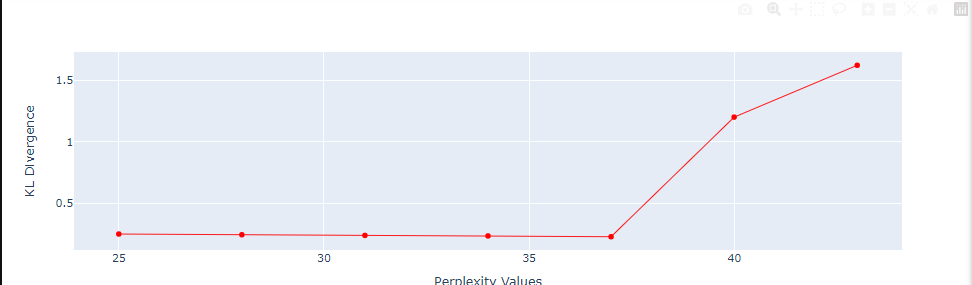

## Wizualizacja

In [13]:
correlation_matrix = tsne_components.corr()
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True,  linewidths=0.5)
plt.show()

NameError: name 'tsne_components' is not defined

In [ ]:
plt.hist(train['SalePrice'], edgecolor='black', bins=20)

In [ ]:
train.head()